In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from kmodes.kmodes import KModes
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
%matplotlib inline

In [27]:
#!pip install kmodes

In [25]:
source=pd.read_csv("D:\\Learning\\Data Science Immaticas\\Group Learning\\ML_Pipeline\\Capstone1\\flying-etiquette.csv")
source.columns=source.columns.str.replace('[#,@,&,?]','')
source.head(5)

C:\Users\gouth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,RespondentID,How often do you travel by plane,Do you ever recline your seat when you fly,How tall are you,Do you have any children under 18,In a row of three seats who should get to use the two arm rests,In a row of two seats who should get to use the middle arm rest,Who should have control over the window shade,Is itrude to move to an unsold seat on a plane,Generally speaking is it rude to say more than a few words tothe stranger sitting next to you on a plane,...,Is itrude to wake a passenger up if you are trying to walk around,In general is itrude to bring a baby on a plane,In general is it rude to knowingly bring unruly children on a plane,Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [26]:
list(source.columns)

['RespondentID',
 'How often do you travel by plane',
 'Do you ever recline your seat when you fly',
 'How tall are you',
 'Do you have any children under 18',
 'In a row of three seats who should get to use the two arm rests',
 'In a row of two seats who should get to use the middle arm rest',
 'Who should have control over the window shade',
 'Is itrude to move to an unsold seat on a plane',
 'Generally speaking is it rude to say more than a few words tothe stranger sitting next to you on a plane',
 "On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat",
 'Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them',
 'Is itrude to recline your seat on a plane',
 'Given the opportunity would you eliminate the possibility of reclining seats on planes entirely',
 'Is it rude to ask someone to switch seats with you in order to be closer to friends',
 'Is itrud

In [27]:
df=source[["How often do you travel by plane",
           "Do you ever recline your seat when you fly",
           "How tall are you",
           "On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat",
           "Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them",
           "Is itrude to recline your seat on a plane",
           "Given the opportunity would you eliminate the possibility of reclining seats on planes entirely",
           "Gender",
           "Age",
           "Household Income",
           "Education",
           "Location (Census Region)"]]
df.head()
df=df.dropna(axis=0,how='any')

In [28]:
cluster_data=df[["How often do you travel by plane",
           "Do you ever recline your seat when you fly",
           "On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat",
           "Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them",
           "Is itrude to recline your seat on a plane",
           "Given the opportunity would you eliminate the possibility of reclining seats on planes entirely"]]
cluster_data.head()
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 2 to 1039
Data columns (total 6 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   How often do you travel by plane                                                                                                        691 non-null    object
 1   Do you ever recline your seat when you fly                                                                                              691 non-null    object
 2   On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat                              691 non-null    object
 3   Under normal circumstances does a person who reclines their seat durin

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1864.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42, cost: 1502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 86, cost: 1495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


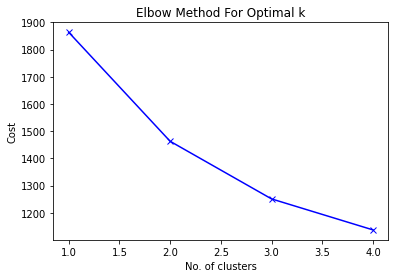

In [29]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 146, cost: 1313.0
Run 1, iteration: 2/100, moves: 46, cost: 1313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 165, cost: 1308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 255, cost: 1292.0
Run 3, iteration: 2/100, moves: 3, cost: 1292.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 194, cost: 1222.0
Run 4, iteration: 2/100, moves: 95, cost: 1222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 68, cost: 1381.0
Best run was number 4


array([2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0,

In [32]:
df.insert(0, "Cluster", clusters, True)
df

,Cluster,How often do you travel by plane,Do you ever recline your seat when you fly,How tall are you,On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat,Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them,Is itrude to recline your seat on a plane,Given the opportunity would you eliminate the possibility of reclining seats on planes entirely,Gender,Age,Household Income,Education,Location (Census Region)
2,2,Once a year or less,Usually,"5'8""",Three times,"Yes, they should not recline their chair if th...","No, not rude at all",No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,2,Once a year or less,Always,"5'11""",Three times,"No, the person on the flight has no obligation...","No, not rude at all",No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,0,Once a month or less,About half the time,"5'7""",Twice,"No, the person on the flight has no obligation...","No, not rude at all",No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
5,0,Once a year or less,Usually,"5'9""",Once,"Yes, they should not recline their chair if th...","No, not rude at all",No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central
6,0,Once a month or less,Once in a while,"6'2""",Twice,"No, the person on the flight has no obligation...","Yes, somewhat rude",Yes,Male,30-44,150000,Some college or Associate degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1,Once a year or less,Never,"5'4""",Three times,"Yes, they should not recline their chair if th...","Yes, very rude",Yes,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central
1032,2,Once a year or less,Always,"5'3""",Once,"No, the person on the flight has no obligation...","No, not rude at all",No,Female,30-44,150000,High school degree,Middle Atlantic
1034,1,A few times per month,Once in a while,"6'1""",Once,"No, the person on the flight has no obligation...","Yes, somewhat rude",Yes,Male,30-44,150000,Graduate degree,Pacific
1035,0,Once a year or less,Once in a while,"5'7""",Three times,"Yes, they should not recline their chair if th...","Yes, somewhat rude",No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central


In [33]:
pd.crosstab(df.Cluster, df.Gender)

Gender,Female,Male
Cluster,,
0,178,155
1,86,85
2,82,105


In [34]:
pd.crosstab(df.Cluster, df.Age)

Age,18-29,30-44,45-60,> 60
Cluster,,,,
0,66,92,99,76
1,36,35,53,47
2,37,53,54,43


In [35]:
pd.crosstab(df.Cluster, df["Location (Census Region)"])

Location (Census Region),East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Cluster,,,,,,,,,
0,51,13,40,25,26,63,53,26,36
1,27,4,18,10,9,34,33,18,18
2,19,7,33,8,10,59,27,11,13


In [36]:
pd.crosstab(df.Cluster, df["Household Income"])

Household Income,"$0 - $24,999","$100,000 - $149,999","$25,000 - $49,999","$50,000 - $99,999",150000
Cluster,,,,,
0,32,60,60,131,50
1,11,41,37,59,23
2,18,44,28,65,32


In [38]:
out=pd.crosstab(df.Cluster, df["Do you ever recline your seat when you fly"],normalize='index') 
round(out*100,0)

Do you ever recline your seat when you fly,About half the time,Always,Never,Once in a while,Usually
Cluster,,,,,
0,17.0,16.0,8.0,45.0,14.0
1,13.0,4.0,57.0,20.0,6.0
2,7.0,29.0,3.0,9.0,51.0


In [39]:
out=pd.crosstab(df.Cluster, df["How often do you travel by plane"],normalize='index') 
round(out*100,0)

How often do you travel by plane,A few times per month,A few times per week,Every day,Once a month or less,Once a year or less
Cluster,,,,,
0,3.0,0.0,0.0,22.0,75.0
1,5.0,1.0,1.0,24.0,70.0
2,4.0,1.0,1.0,25.0,70.0


In [67]:
out=pd.crosstab(df.Cluster, df["On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat"],normalize='index') 
round(out*100,0)
#           "Is itrude to recline your seat on a plane",
#          "Given the opportunity would you eliminate the possibility of reclining seats on planes entirely"]]

On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat,Four times,It is not okay to get up during flight,More than five times times,Once,Three times,Twice
Cluster,,,,,,
0,13.0,1.0,13.0,7.0,50.0,16.0
1,11.0,2.0,6.0,10.0,29.0,43.0
2,14.0,1.0,11.0,8.0,18.0,49.0


In [68]:
out=pd.crosstab(df.Cluster, df["Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them"],normalize='index') 
round(out*100,0)


Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them,"No, the person on the flight has no obligation to the person behind them","Yes, they should not recline their chair if the person behind them asks them not to"
Cluster,,
0,73.0,27.0
1,8.0,92.0
2,8.0,92.0


In [11]:
df.head(5)

,Cluster,How often do you travel by plane,Do you ever recline your seat when you fly,How tall are you,On a 6 hour flight from NYC to LA how many times is it acceptable to get up if you're not in an aisle seat,Under normal circumstances does a person who reclines their seat during a flight have any obligation to the person sitting behind them,Is itrude to recline your seat on a plane,Given the opportunity would you eliminate the possibility of reclining seats on planes entirely,Gender,Age,Household Income,Education,Location (Census Region)
2,0,Once a year or less,Usually,"5'8""",Three times,"Yes, they should not recline their chair if th...","No, not rude at all",No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,0,Once a year or less,Always,"5'11""",Three times,"No, the person on the flight has no obligation...","No, not rude at all",No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,0,Once a month or less,About half the time,"5'7""",Twice,"No, the person on the flight has no obligation...","No, not rude at all",No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
5,0,Once a year or less,Usually,"5'9""",Once,"Yes, they should not recline their chair if th...","No, not rude at all",No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central
6,1,Once a month or less,Once in a while,"6'2""",Twice,"No, the person on the flight has no obligation...","Yes, somewhat rude",Yes,Male,30-44,150000,Some college or Associate degree,Pacific


In [13]:
X = df.drop('Cluster',axis='columns')
y = df.Cluster 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'Once a year or less'

In [ ]:
from missingpy import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
X = iris.drop('species', axis=1)
X_imputed = imputer.fit_transform(X)
